# Feature Engineering

Feature engineering is one of the most important skills needed in data science and machine learning. It has a major influence on the performance of machine learning models

## Categorical Features

One of most common non-numerical data is *categorical* data. For example, considering different cars models which has no of seats, company name, etc.
.
For example, your data might look something like this:

In [ ]:
data = [
    {'price': 950000, 'seat': 6, 'company': 'BMW'},
    {'price': 600000, 'seat': 8, 'company': 'Volvo'},
    {'price': 680000, 'seat': 4, 'company': 'Toyota'},
    {'price': 550000, 'seat': 2, 'company': 'Honda'}
]

A first attmept to encode the company name in such type of data with a straightforward numerical mapping:

In [ ]:
{'BMW': 1, 'Volvo': 2, 'Toyota': 3, 'Honda': 4};

This adhoc encoding turns out to be diaster since associated numercial values would be interpreated by ML model as numercial feature where:
BMW < Volvo < Toyota < Honda
But we are sure these are neither the company tranking notr anything but just names of companies.
In this case, one proven method would be one-hot encoding, which effectively represents the encoding using value of 1 or 0. May create creates extra columns indicating the presence or absence of a category but de-associate the issues discussed above.
In Scikit-Learn's ``DictVectorizer`` would be the choice:

In [ ]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     1,      0,      0,      0, 950000,      6],
       [     0,      0,      0,      1, 600000,      8],
       [     0,      0,      1,      0, 680000,      4],
       [     0,      1,      0,      0, 550000,      2]])

Notice that company name column splited into four column one hot encoding.

To see the meaning of each column, you can inspect the feature names:

In [ ]:
vec.get_feature_names()

['company=BMW',
 'company=Honda',
 'company=Toyota',
 'company=Volvo',
 'price',
 'seat']

## Derived Features

Another useful type of feature is one that is mathematically derived from some input features.

Lets see a example where convert a linear regression into a polynomial regression not by changing the model, but by transforming the input!

For example, this data clearly cannot be well described by a straight line:

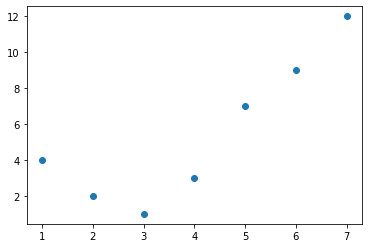

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([4, 2, 1, 3, 7, 9, 12])
plt.scatter(x, y);

what if we  fit a line to the data using ``LinearRegression`` and get the optimal result:

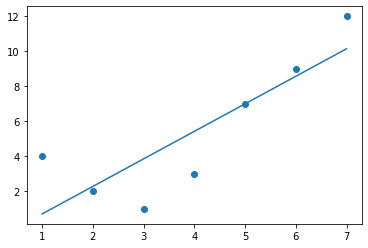

In [ ]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

It seems that we need a more complex model to describe the relationship between $x$ and $y$ being not linear.

One approach is to transform the data, adding extra columns of features to provide flexibility in the model. Lets create dervived features


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]]


The derived feature matrix has one column representing $x$, and a second column representing $x^2$, and a third column representing $x^3$.
Computing a linear regression on this expanded input gives a much closer fit to the data:

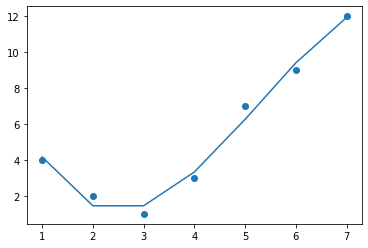

In [ ]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

This idea of improving a model not by changing the model, but by transforming the inputs, is fundamental to many of the more powerful machine learning methods.

## Imputation of Missing Data

Another common need in feature engineering is handling of missing data.
For example, we might have a dataset that looks like this:

In [ ]:
from numpy import nan
X = np.array([[ nan, 2,   7  ],
              [ 3,   7,   6  ],
              [ 5,   3,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ],
              [ 11,   6,   nan]])
y = np.array([14, 16, -1,  8, -5, 7])

Before applying machine learning model to such data, we will need to first replace such missing data with some appropriate fill value.
We need to impute on missing values, and strategies range from simplely replacing missing values with the mean of the column) to more detailed  using matrix completion, etc.

For a baseline imputation approach, using the mean, median, like that, Scikit-Learn provides the ``Imputer`` class:

In [ ]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(X)
X2=impute.transform(X)
print(X2)

[[ 6.2  2.   7. ]
 [ 3.   7.   6. ]
 [ 5.   3.   2. ]
 [ 4.   5.2  6. ]
 [ 8.   8.   1. ]
 [11.   6.   4.4]]


We see that in the resulting data, the two missing values have been replaced with the mean of the remaining values in the column. This imputed data can then be fed directly into, for example, a ``LinearRegression`` estimator:

In [ ]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.81705288, 12.94102295, -2.1126057 , 12.09043166, -3.86914161,
        6.13323982])

## Feature Pipelines

Applying multiple feature engineering techniques may lead improvision but case challenging implementtion.
As for example:

1. Impute missing values using the mean
2. Transform features to quadratic
3. Fit a linear regression

To streamline this type of processing pipeline, Scikit-Learn provides a ``Pipeline`` object

In [ ]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

This pipeline looks and acts like a standard Scikit-Learn object, and will apply all the specified steps to any input data.

In [ ]:
model.fit(X, y)  # X with missing values, from above
print(y)
print(model.predict(X))

[14 16 -1  8 -5  7]
[14. 16. -1.  8. -5.  7.]


In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2) # reduce dimension from 3 to 2
Y_sklearn = sklearn_pca.fit_transform(x)